Setting Up

In [2]:
# %pip install catboost

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=0.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

Dataset

In [8]:
#Importing the dataset

file_path = 'CarPrice_Assignment.csv'
df = pd.read_csv(file_path)

In [17]:
#Look the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Adding New Feature

In [21]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

In [22]:
df.select_dtypes(include="object").head()

,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [23]:
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
# Feature Engineering
df['volume'] = df['carwidth'] * df['carlength'] * df['carheight']

df['rpm_per_hp'] = df['peakrpm'] / df['horsepower']
df['weight_to_area'] = df['curbweight'] / (df['carwidth'] * df['carlength'])
df['engine_density'] = df['enginesize'] / df['volume']
df['avg_mpg'] = (df['citympg'] + df['highwaympg']) / 2

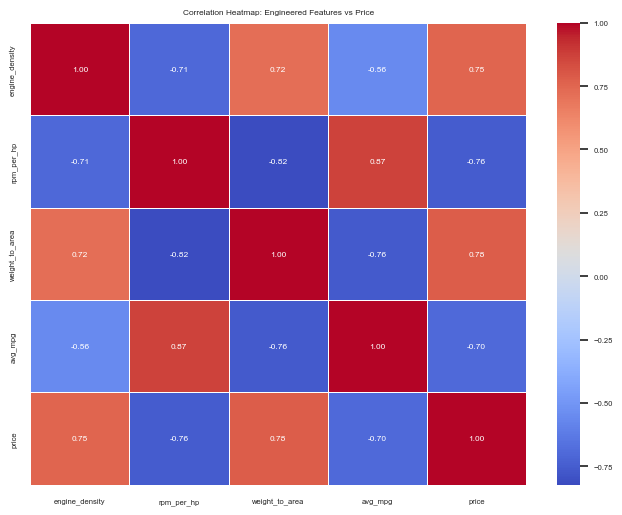

In [25]:
engineered_features = [
    'engine_density',   # enginesize / volume
    'rpm_per_hp',       # peakrpm / horsepower
    'weight_to_area',    # curbweight / (carwidth * carlength)
    'avg_mpg' #(citympg+highwaympg)/2
]

# Tambahkan 'price' ke list
features_with_price = engineered_features + ['price']

# Buat heatmap korelasi
correlation_matrix_with_price = df[features_with_price].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_with_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Engineered Features vs Price')
plt.show()

Segmentasi

In [26]:
#Standarisasi kolom harga
scaler = StandardScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])

In [27]:
#Elbow Method untuk menentukan jumlah klaster
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['price_scaled']])
    sse.append(km.inertia_)

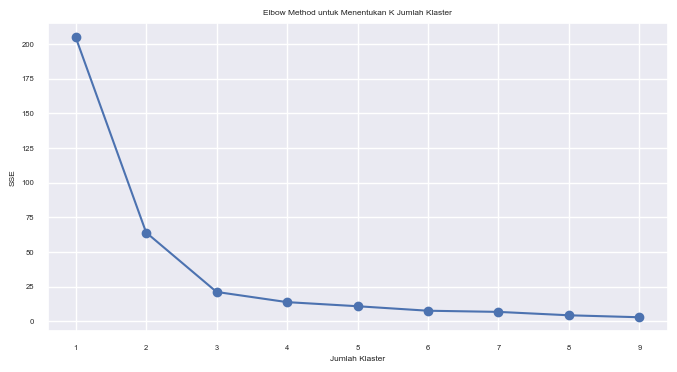

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method untuk Menentukan K Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


               count          mean      min      max
price_cluster                                       
0                124   8413.596774   5118.0  12629.0
1                 64  16985.565109  12764.0  25552.0
2                 17  34786.088235  28176.0  45400.0


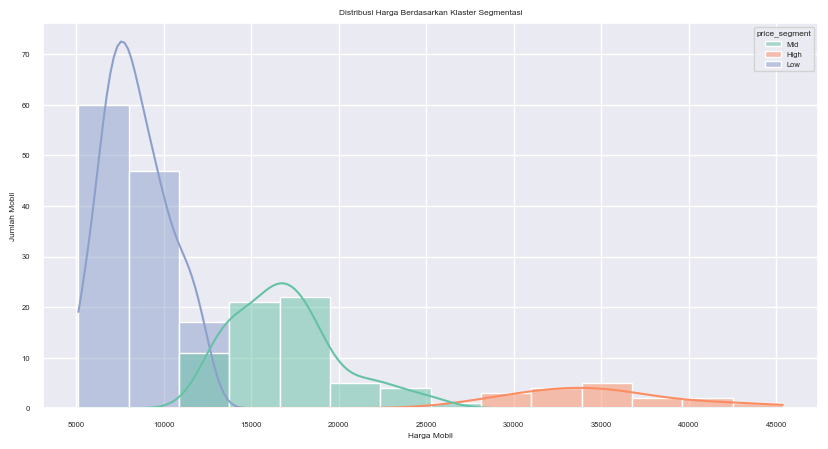

In [29]:
# Clustering dengan K-Means (ganti jumlah klaster sesuai hasil elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df['price_cluster'] = kmeans.fit_predict(df[['price_scaled']])

# Analisis rata-rata harga di tiap cluster
price_cluster_info = df.groupby('price_cluster')['price'].agg(['count', 'mean', 'min', 'max']).sort_values('mean')
print(price_cluster_info)

# Mapping klaster ke label segmen
cluster_order = price_cluster_info.reset_index().sort_values('mean')
label_map = {cluster_order.iloc[i]['price_cluster']: label for i, label in enumerate(['Low', 'Mid', 'High'])}

df['price_segment'] = df['price_cluster'].map(label_map)

# Visualisasi klaster
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='price', hue='price_segment', palette='Set2', kde=True)
plt.title('Distribusi Harga Berdasarkan Klaster Segmentasi')
plt.xlabel('Harga Mobil')
plt.ylabel('Jumlah Mobil')
plt.show()


In [30]:
df.head()

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume,rpm_per_hp,weight_to_area,engine_density,avg_mpg,price_scaled,price_cluster,price_segment
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,45.045045,0.235488,0.000246,24.0,0.027391,1,Mid
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,45.045045,0.235488,0.000246,24.0,0.404461,1,Mid
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,32.467532,0.251748,0.000259,22.5,0.404461,1,Mid
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,53.921569,0.199899,0.000172,27.0,0.084485,1,Mid
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,47.826087,0.240827,0.000214,20.0,0.523668,1,Mid


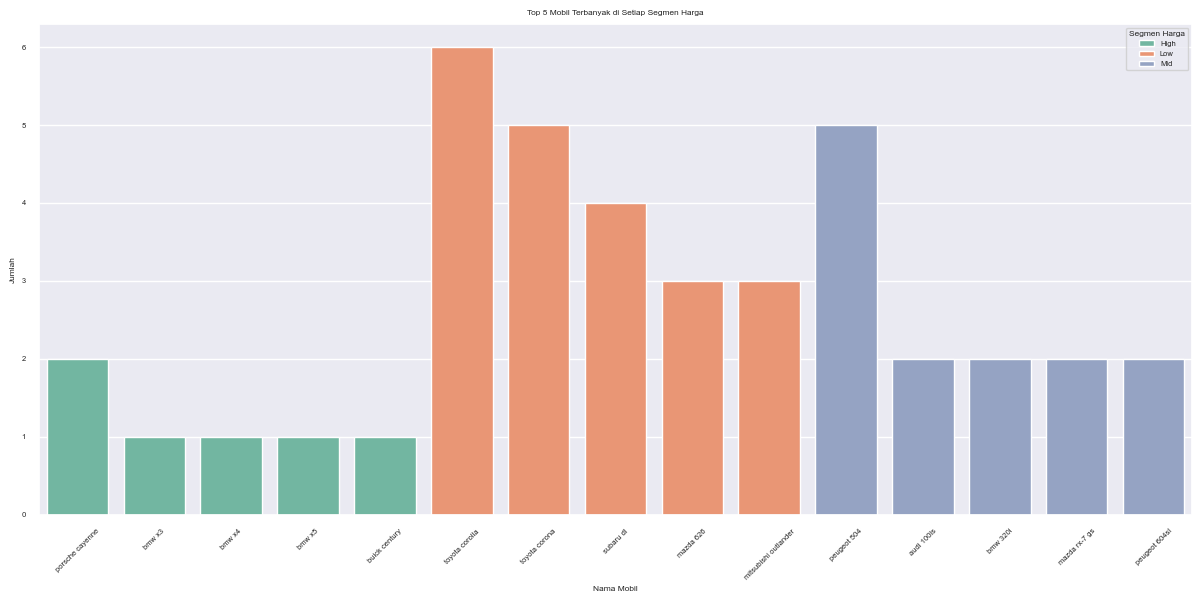

In [31]:
top_cars_per_segment = (
    df.groupby('price_segment')['CarName']
    .value_counts()
    .groupby(level=0)
    .nlargest(5)
    .reset_index(level=0, name='count')
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_cars_per_segment,
    x='CarName', y='count',
    hue='price_segment', palette='Set2'
)
plt.title('Top 5 Mobil Terbanyak di Setiap Segmen Harga')
plt.xlabel('Nama Mobil')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Segmen Harga')
plt.tight_layout()
plt.show()

Building a Machine Learning

In [32]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

In [33]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

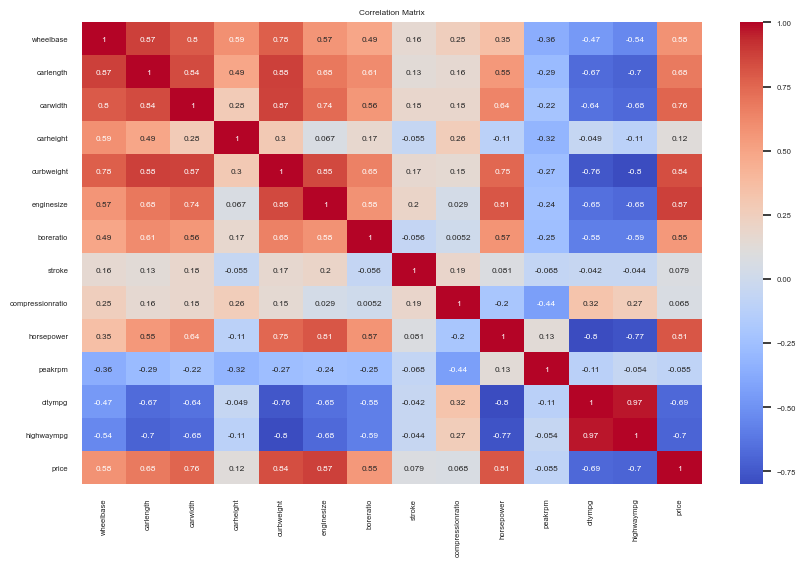

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[numerical_features])
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            features          VIF
0              const  4937.381395
1          wheelbase     7.398201
2          carlength     9.566268
3           carwidth     5.709889
4          carheight     2.222671
5         curbweight    16.514490
6         enginesize     9.166569
7          boreratio     2.111655
8             stroke     1.290883
9   compressionratio     2.322776
10        horsepower     8.403745
11           peakrpm     2.188544
12           citympg    27.589928
13        highwaympg    24.482301
14             price     6.702086


In [36]:
numeric_features1 = [
    'curbweight',
    'horsepower',
    'enginesize'
]

In [37]:
numeric_features = [
    'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg'
]

In [38]:
categorical_features = [
    'CompanyName',
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

In [39]:
final_features = numeric_features + categorical_features

In [40]:
new_df = df[final_features].copy()
new_df['price_segment'] = df['price_segment']

Encoding

In [41]:
df_encoded = pd.get_dummies(new_df, columns=categorical_features, drop_first=True)

encoded_categoricals = [col for col in df_encoded.columns if any(prefix in col for prefix in categorical_features)]

# Gabungkan semua fitur final
features = numeric_features + encoded_categoricals

In [42]:
df_encoded.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price_segment,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_maxda,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porcshce,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_toyouta,CompanyName_vokswagen,CompanyName_volkswagen,CompanyName_volvo,CompanyName_vw,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,Mid,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,Mid,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,Mid,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,Mid,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,Mid,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


Selecting Features & Labels for Model Training & Testing

In [43]:
X = df_encoded[features]
y = df_encoded['price_segment']

In [44]:
X.shape

(205, 63)

In [45]:
y.shape

(205,)

Splitting Data for Model Traning & Testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [47]:
print("x_train - >  ",X_train.shape)
print("x_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 63)
x_test - >   (41, 63)
y_train - >   (164,)
y_test - >   (41,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [49]:
models = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'LightGBM'
    'CatBoost'
]

In [50]:
algorithms = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=0)
]

In [51]:
training_score = []
testing_score = []

In [52]:
from sklearn.metrics import accuracy_score

for name, model in zip(models, algorithms):
    try:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        acc_train = accuracy_score(y_train, y_train_pred)*100
        acc_test = accuracy_score(y_test, y_test_pred)*100

        training_score.append(acc_train)
        testing_score.append(acc_test)

        print(f"{name}: DONE")

    except Exception as e:
        print(f"{name}: ERROR → {e}")

Linear Regression: DONE
Decision Tree: DONE
Random Forest: DONE
AdaBoost: DONE
Gradient Boosting: DONE
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 20
[LightGBM] [Info] Start training from score -2.460809
[LightGBM] [Info] Start training from score -0.504747
[LightGBM] [Info] Start training from score -1.168041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [53]:
print(len(models), len(training_score), len(testing_score))

6 6 6


In [54]:
df_algoritma = pd.DataFrame({
    "Algorithms": models,
    "Training Score": training_score,
    "Testing Score": testing_score
})
display(df_algoritma)

,Algorithms,Training Score,Testing Score
0,Linear Regression,95.121951,95.121951
1,Decision Tree,100.000000,97.560976
2,Random Forest,100.000000,95.121951
3,AdaBoost,98.170732,97.560976
4,Gradient Boosting,100.000000,95.121951
5,LightGBMCatBoost,99.390244,95.121951


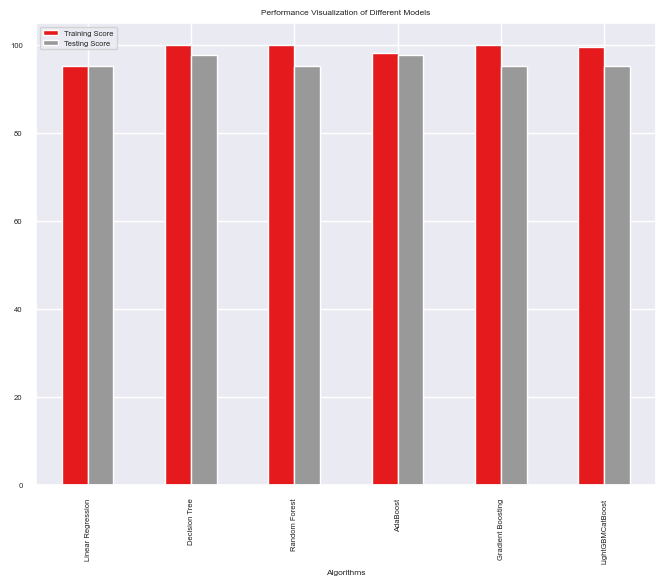

In [55]:
df_algoritma.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(8,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

Model XGBoost dan LightGBM

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# --- LightGBM ---
X_lgb = X.copy()
y_lgb = y.copy()

le_lgb = LabelEncoder()
y_lgb_encoded = le_lgb.fit_transform(y_lgb)

X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(
    X_lgb, y_lgb_encoded, test_size=0.2, stratify=y_lgb_encoded, random_state=42
)

lgb_model = LGBMClassifier()
lgb_model.fit(X_lgb_train, y_lgb_train)

y_lgb_train_pred = lgb_model.predict(X_lgb_train)
y_lgb_test_pred = lgb_model.predict(X_lgb_test)

acc_train_lgb = accuracy_score(y_lgb_train, y_lgb_train_pred) * 100
acc_test_lgb = accuracy_score(y_lgb_test, y_lgb_test_pred) * 100

print(f"LightGBM Training Accuracy: {acc_train_lgb:.2f}%")
print(f"LightGBM Testing Accuracy : {acc_test_lgb:.2f}%")


# --- XGBoost ---
X_xgb = X.copy()
y_xgb = y.copy()

le_xgb = LabelEncoder()
y_xgb_encoded = le_xgb.fit_transform(y_xgb)

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(
    X_xgb, y_xgb_encoded, test_size=0.2, stratify=y_xgb_encoded, random_state=42
)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_xgb_train, y_xgb_train)

y_xgb_train_pred = xgb_model.predict(X_xgb_train)
y_xgb_test_pred = xgb_model.predict(X_xgb_test)

acc_train_xgb = accuracy_score(y_xgb_train, y_xgb_train_pred) * 100
acc_test_xgb = accuracy_score(y_xgb_test, y_xgb_test_pred) * 100

print(f"XGBoost Training Accuracy: {acc_train_xgb:.2f}%")
print(f"XGBoost Testing Accuracy : {acc_test_xgb:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 20
[LightGBM] [Info] Start training from score -2.460809
[LightGBM] [Info] Start training from score -0.504747
[LightGBM] [Info] Start training from score -1.168041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

Regresi

In [57]:
df.head()

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume,rpm_per_hp,weight_to_area,engine_density,avg_mpg,price_scaled,price_cluster,price_segment
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,45.045045,0.235488,0.000246,24.0,0.027391,1,Mid
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,45.045045,0.235488,0.000246,24.0,0.404461,1,Mid
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,32.467532,0.251748,0.000259,22.5,0.404461,1,Mid
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,53.921569,0.199899,0.000172,27.0,0.084485,1,Mid
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,47.826087,0.240827,0.000214,20.0,0.523668,1,Mid


In [58]:
new_df['price'] = df['price']
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,price_segment,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,mpfi,Mid,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,mpfi,Mid,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,alfa-romero,gas,std,two,hatchback,rwd,ohcv,six,mpfi,Mid,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,audi,gas,std,four,sedan,fwd,ohc,four,mpfi,Mid,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,audi,gas,std,four,sedan,4wd,ohc,five,mpfi,Mid,17450.0


In [63]:
new_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === FINAL Preprocessing untuk regresi ===
# Step 1: Encoding fitur kategorikal
df_regresi = pd.get_dummies(new_df, columns=categorical_features, drop_first=True)

# Step 2: Identifikasi semua fitur dummy hasil encoding
regresi_categoricals = [col for col in df_regresi.columns if any(prefix in col for prefix in categorical_features)]

# Step 3: Gabungkan semua fitur (numeric + engineered + dummy)
regresi_features = numeric_features + regresi_categoricals

# Step 4: Pisahkan fitur dan target
X_regresi = df_regresi[regresi_features]
y_regresi = df_regresi['price']

# Step 5: Scaling hanya untuk fitur numeric dan engineered
scaler = StandardScaler()
X_regresi_scaled = X_regresi.copy()
X_regresi_scaled[numeric_features] = scaler.fit_transform(X_regresi_scaled[numeric_features])

# Step 6: Split data untuk training dan testing
X_regresi_train, X_regresi_test, y_regresi_train, y_regresi_test = train_test_split(
    X_regresi_scaled, y_regresi, test_size=0.2, random_state=42
)

# Step 7: Batas segmen harga (hasil clustering sebelumnya)
bins = [0, 10495, 19045, 45400]  # Low, Mid, High

# Step 8: Fungsi segmentasi harga
def assign_price_segment(price, bins):
    if price <= bins[1]:
        return 'Low'
    elif price <= bins[2]:
        return 'Mid'
    else:
        return 'High'


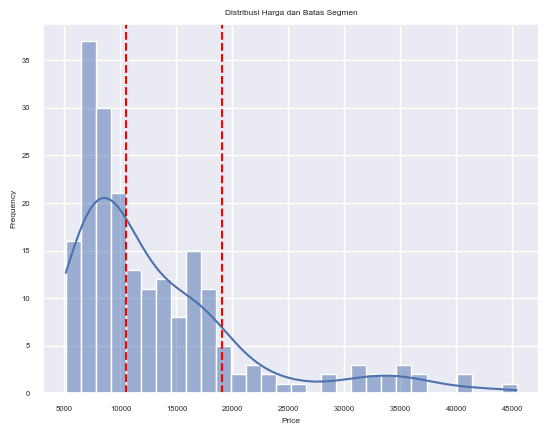

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=30, kde=True)
for b in bins[1:-1]:
    plt.axvline(b, color='red', linestyle='--')
plt.title('Distribusi Harga dan Batas Segmen')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [61]:
print("x_regresi_train - >  ",X_regresi_train.shape)
print("x_regresi_test - >  ",X_regresi_test.shape)
print("y_regresi_train - >  ",y_regresi_train.shape)
print("y_regresi_test - >  ",y_regresi_test.shape)

x_regresi_train - >   (164, 63)
x_regresi_test - >   (41, 63)
y_regresi_train - >   (164,)
y_regresi_test - >   (41,)


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report

# Inisialisasi model-model
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('LightGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(verbose=0))
]

# Loop model
for name, model in models:
    model.fit(X_regresi_train, y_regresi_train)
    y_pred = model.predict(X_regresi_test)

    # Evaluasi regresi
    rmse = np.sqrt(mean_squared_error(y_regresi_test, y_pred))
    mae = mean_absolute_error(y_regresi_test, y_pred)
    r2 = r2_score(y_regresi_test, y_pred)

    # Segmentasi prediksi dan aktual
    predicted_segments = [assign_price_segment(p, bins) for p in y_pred]
    actual_segments = [assign_price_segment(p, bins) for p in y_regresi_test]

    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")
    print("Segment Classification Report:")
    print(classification_report(actual_segments, predicted_segments))
    accuracy = accuracy_score(actual_segments, predicted_segments) * 100
    print(f"Akurasi Segmentasi Harga: {accuracy:.2f}%")


Linear Regression
RMSE: 2781.97 | MAE: 1843.42 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       1.00      0.83      0.90        23
         Mid       0.67      0.91      0.77        11

    accuracy                           0.85        41
   macro avg       0.84      0.86      0.84        41
weighted avg       0.89      0.85      0.86        41

Akurasi Segmentasi Harga: 85.37%

Decision Tree
RMSE: 2796.48 | MAE: 1851.83 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.96      0.98        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.94      0.94        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.

# MLFlow Tracking

In [2]:
import os
import mlflow
from mlflow.models.signature import infer_signature

In [ ]:
os.environ["AWS_ACCESS_KEY_ID"] = "minioadmin"
os.environ["AWS_SECRET_ACCESS_KEY"] = "minioadmin"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://192.168.100.11:9000"

mlflow.set_tracking_uri("http://192.168.100.11:5000")
mlflow.set_experiment("regression_with_segmentation")

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)  # hanya kolom numerik
    ],
    remainder='passthrough'  # biarkan kolom dummy tetap
)

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('LightGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(verbose=0))
]

In [ ]:
# 1
for name, model in models:
    with mlflow.start_run(run_name=name):

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Training
        pipeline.fit(X_regresi_train, y_regresi_train)
        y_pred = pipeline.predict(X_regresi_test)

        # Evaluasi regresi
        rmse = np.sqrt(mean_squared_error(y_regresi_test, y_pred))
        mae = mean_absolute_error(y_regresi_test, y_pred)
        mse = mean_squared_error(y_regresi_test, y_pred)
        r2 = r2_score(y_regresi_test, y_pred)

        # Segmentasi prediksi dan aktual
        predicted_segments = [assign_price_segment(p, bins) for p in y_pred]
        actual_segments = [assign_price_segment(p, bins) for p in y_regresi_test]

        acc_segment = accuracy_score(actual_segments, predicted_segments) * 100
        class_report = classification_report(actual_segments, predicted_segments, output_dict=True)

        # Logging parameter & metrik utama
        mlflow.log_param("model_name", name)
        metrics = {
            "rmse": rmse,
            "mae": mae,
            "r2": r2,
            "mse": mse,
            "segment_accuracy": acc_segment
        }
        mlflow.log_metrics(metrics)

        # Logging classification report per label
        for label, scores in class_report.items():
            if isinstance(scores, dict):
                for metric_name, metric_value in scores.items():
                    mlflow.log_metric(f"segment_{label}_{metric_name}", metric_value)

        # Signature untuk model
        signature = infer_signature(X_regresi_test, y_pred)

        # Logging model (pipeline)
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            name="model",
            signature=signature,
            registered_model_name=f"{name.replace(' ', '_')}_Regressor"
        )

        print(f"\n{name}")
        print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")
        print("Segment Classification Report:")
        print(classification_report(actual_segments, predicted_segments))
        print(f"Akurasi Segmentasi Harga: {acc_segment:.2f}%")

Registered model 'Linear_Regression_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:33:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Linear_Regression_Regressor, version 2
Created version '2' of model 'Linear_Regression_Regressor'.



Linear Regression
RMSE: 2781.97 | MAE: 1843.42 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       1.00      0.83      0.90        23
         Mid       0.67      0.91      0.77        11

    accuracy                           0.85        41
   macro avg       0.84      0.86      0.84        41
weighted avg       0.89      0.85      0.86        41

Akurasi Segmentasi Harga: 85.37%
🏃 View run Linear Regression at: http://192.168.100.11:5000/#/experiments/2/runs/2ccd6d7012be46889891c32387e7a94f
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'Decision_Tree_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:33:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision_Tree_Regressor, version 2
Created version '2' of model 'Decision_Tree_Regressor'.



Decision Tree
RMSE: 2855.30 | MAE: 1920.70 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.96      0.98        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.94      0.94        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run Decision Tree at: http://192.168.100.11:5000/#/experiments/2/runs/c8fe3ac2148d4b428c33daa6a8024132
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'Random_Forest_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:34:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random_Forest_Regressor, version 2
Created version '2' of model 'Random_Forest_Regressor'.



Random Forest
RMSE: 1871.24 | MAE: 1294.14 | R2: 0.96
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.96      0.98        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.94      0.94        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run Random Forest at: http://192.168.100.11:5000/#/experiments/2/runs/dab0b708dca44bc883124d93271fe651
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'AdaBoost_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:34:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: AdaBoost_Regressor, version 2
Created version '2' of model 'AdaBoost_Regressor'.



AdaBoost
RMSE: 2698.29 | MAE: 2084.97 | R2: 0.91
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       1.00      0.91      0.95        23
         Mid       0.83      0.91      0.87        11

    accuracy                           0.93        41
   macro avg       0.90      0.94      0.92        41
weighted avg       0.93      0.93      0.93        41

Akurasi Segmentasi Harga: 92.68%
🏃 View run AdaBoost at: http://192.168.100.11:5000/#/experiments/2/runs/978af6c8a1f54d23a9dd8923bf3e247a
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'Gradient_Boosting_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:34:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Gradient_Boosting_Regressor, version 2
Created version '2' of model 'Gradient_Boosting_Regressor'.



Gradient Boosting
RMSE: 2481.90 | MAE: 1720.72 | R2: 0.92
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       0.96      0.96      0.96        23
         Mid       0.90      0.82      0.86        11

    accuracy                           0.93        41
   macro avg       0.91      0.92      0.92        41
weighted avg       0.93      0.93      0.93        41

Akurasi Segmentasi Harga: 92.68%
🏃 View run Gradient Boosting at: http://192.168.100.11:5000/#/experiments/2/runs/794d4c6757de492796f66d33711936ad
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'LightGBM_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:34:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM_Regressor, version 2
Created version '2' of model 'LightGBM_Regressor'.



LightGBM
RMSE: 3348.53 | MAE: 2226.10 | R2: 0.86
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      0.91      0.95        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.97      0.96        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run LightGBM at: http://192.168.100.11:5000/#/experiments/2/runs/008a973142dd43d3af47511e17640a15
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


Registered model 'CatBoost_Regressor' already exists. Creating a new version of this model...
2025/08/06 12:35:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CatBoost_Regressor, version 2
Created version '2' of model 'CatBoost_Regressor'.



CatBoost
RMSE: 2078.30 | MAE: 1374.93 | R2: 0.95
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      0.96      0.98        23
         Mid       0.92      1.00      0.96        11

    accuracy                           0.98        41
   macro avg       0.97      0.99      0.98        41
weighted avg       0.98      0.98      0.98        41

Akurasi Segmentasi Harga: 97.56%
🏃 View run CatBoost at: http://192.168.100.11:5000/#/experiments/2/runs/864ad1e00ac140828883bf68f10b0147
🧪 View experiment at: http://192.168.100.11:5000/#/experiments/2


In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('LightGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(verbose=0))
]

In [69]:
df_regresi2 = new_df.copy()

In [70]:
X_regresi = df_regresi2.drop(columns=['price', 'price_segment'])
y_regresi = df_regresi2['price']

In [71]:
X_regresi_train, X_regresi_test, y_regresi_train, y_regresi_test = train_test_split(
    X_regresi, y_regresi, test_size=0.2, random_state=42
)

In [72]:
# 2
for name, model in models:
    with mlflow.start_run(run_name=name):

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Training
        pipeline.fit(X_regresi_train, y_regresi_train)
        y_pred = pipeline.predict(X_regresi_test)

        # Evaluasi regresi
        rmse = np.sqrt(mean_squared_error(y_regresi_test, y_pred))
        mae = mean_absolute_error(y_regresi_test, y_pred)
        mse = mean_squared_error(y_regresi_test, y_pred)
        r2 = r2_score(y_regresi_test, y_pred)

        # Segmentasi prediksi dan aktual
        predicted_segments = [assign_price_segment(p, bins) for p in y_pred]
        actual_segments = [assign_price_segment(p, bins) for p in y_regresi_test]

        acc_segment = accuracy_score(actual_segments, predicted_segments) * 100
        class_report = classification_report(actual_segments, predicted_segments, output_dict=True)

        # Logging parameter & metrik utama
        mlflow.log_param("model_name", name)
        metrics = {
            "rmse": rmse,
            "mae": mae,
            "r2": r2,
            "mse": mse,
            "segment_accuracy": acc_segment
        }
        mlflow.log_metrics(metrics)

        # Logging classification report per label
        for label, scores in class_report.items():
            if isinstance(scores, dict):
                for metric_name, metric_value in scores.items():
                    mlflow.log_metric(f"segment_{label}_{metric_name}", metric_value)

        # Signature untuk model
        signature = infer_signature(X_regresi_test, y_pred)

        # Logging model (pipeline)
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            name="model",
            signature=signature,
            registered_model_name=f"{name.replace(' ', '_')}_Regressor"
        )

        print(f"\n{name}")
        print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")
        print("Segment Classification Report:")
        print(classification_report(actual_segments, predicted_segments))
        print(f"Akurasi Segmentasi Harga: {acc_segment:.2f}%")

Successfully registered model 'Linear_Regression_Regressor'.
2025/08/07 00:14:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Linear_Regression_Regressor, version 1
Created version '1' of model 'Linear_Regression_Regressor'.



Linear Regression
RMSE: 2781.97 | MAE: 1843.40 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       1.00      0.83      0.90        23
         Mid       0.67      0.91      0.77        11

    accuracy                           0.85        41
   macro avg       0.84      0.86      0.84        41
weighted avg       0.89      0.85      0.86        41

Akurasi Segmentasi Harga: 85.37%
🏃 View run Linear Regression at: http://103.150.91.249:5000/#/experiments/2/runs/a21b3ffaef7f48a890b400273e282998
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'Decision_Tree_Regressor'.
2025/08/07 00:14:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision_Tree_Regressor, version 1
Created version '1' of model 'Decision_Tree_Regressor'.



Decision Tree
RMSE: 2823.53 | MAE: 1926.37 | R2: 0.90
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.96      0.98        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.94      0.94        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run Decision Tree at: http://103.150.91.249:5000/#/experiments/2/runs/263a5748c7494ae5818d541759e54387
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'Random_Forest_Regressor'.
2025/08/07 00:15:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random_Forest_Regressor, version 1
Created version '1' of model 'Random_Forest_Regressor'.



Random Forest
RMSE: 1820.33 | MAE: 1268.04 | R2: 0.96
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.96      0.98        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.94      0.94        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run Random Forest at: http://103.150.91.249:5000/#/experiments/2/runs/43609fd88f034b7da80c861cea923a45
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'AdaBoost_Regressor'.
2025/08/07 00:15:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: AdaBoost_Regressor, version 1
Created version '1' of model 'AdaBoost_Regressor'.



AdaBoost
RMSE: 2620.91 | MAE: 2013.95 | R2: 0.91
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       1.00      0.87      0.93        23
         Mid       0.77      0.91      0.83        11

    accuracy                           0.90        41
   macro avg       0.88      0.93      0.90        41
weighted avg       0.92      0.90      0.90        41

Akurasi Segmentasi Harga: 90.24%
🏃 View run AdaBoost at: http://103.150.91.249:5000/#/experiments/2/runs/e5d172256c5c432ca4b8323842c091b6
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'Gradient_Boosting_Regressor'.
2025/08/07 00:15:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Gradient_Boosting_Regressor, version 1
Created version '1' of model 'Gradient_Boosting_Regressor'.



Gradient Boosting
RMSE: 2475.90 | MAE: 1717.77 | R2: 0.92
Segment Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       0.96      0.96      0.96        23
         Mid       0.90      0.82      0.86        11

    accuracy                           0.93        41
   macro avg       0.91      0.92      0.92        41
weighted avg       0.93      0.93      0.93        41

Akurasi Segmentasi Harga: 92.68%
🏃 View run Gradient Boosting at: http://103.150.91.249:5000/#/experiments/2/runs/aaf95220d109435f8983ff5a82e53030
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'LightGBM_Regressor'.
2025/08/07 00:15:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM_Regressor, version 1
Created version '1' of model 'LightGBM_Regressor'.



LightGBM
RMSE: 3348.53 | MAE: 2226.10 | R2: 0.86
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      0.91      0.95        23
         Mid       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.97      0.96        41
weighted avg       0.96      0.95      0.95        41

Akurasi Segmentasi Harga: 95.12%
🏃 View run LightGBM at: http://103.150.91.249:5000/#/experiments/2/runs/8c6a41936e7843e48e167e13d288cd10
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


Successfully registered model 'CatBoost_Regressor'.
2025/08/07 00:16:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CatBoost_Regressor, version 1
Created version '1' of model 'CatBoost_Regressor'.



CatBoost
RMSE: 2078.30 | MAE: 1374.93 | R2: 0.95
Segment Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      0.96      0.98        23
         Mid       0.92      1.00      0.96        11

    accuracy                           0.98        41
   macro avg       0.97      0.99      0.98        41
weighted avg       0.98      0.98      0.98        41

Akurasi Segmentasi Harga: 97.56%
🏃 View run CatBoost at: http://103.150.91.249:5000/#/experiments/2/runs/71d7ebdcee7c430192213c35490937b6
🧪 View experiment at: http://103.150.91.249:5000/#/experiments/2


In [ ]:
loaded_model = mlflow.sklearn.load_model("runs:/dab0b708dca44bc883124d93271fe651/model")
print(loaded_model)

In [1]:
from mlflow.tracking import MlflowClient

In [4]:
def promote_model_to_stages(model_name: str, version: int, stage: str):
    """ Promotes a model version to a specified stage.
    Args:
        model_name (str): Name of the registered model.
        version (int): Version of the model to promote.
        stage (str): Stage to promote the model to (e.g., "Production", "Staging", "None").
    """
    client = MlflowClient()

    print(f"Promoting model '{model_name}' version {version} to stage '{stage}'...")
    client.transition_model_version_stage(
        name=model_name,
        version=version,
        stage=stage,
        archive_existing_versions=False  # optional: archives existing models in target stage
    )
    print("Promotion complete.")


In [5]:
promote_model_to_stages(model_name="Random_Forest_Regressor", version=1, stage="Staging")

Promoting model 'Linear_Regression_Regressor' version 1 to stage 'Staging'...


C:\Users\HP\AppData\Local\Temp\ipykernel_8036\4259275733.py:11: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Promotion complete.
